<a href="https://colab.research.google.com/github/AnanyaTayalSC/Drafts/blob/main/layer1_128_64_epoch30_batchsize32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scipy numpy

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import scipy.io
import pandas as pd


In [ ]:
# Define the path to your CSV file
#import sys
#sys.path.append('/content/drive/MyDrive/Colab Notebooks/Thesis')
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/v_ego.csv'

# Load the CSV file into a pandas DataFrame
# parse_dates tells pandas to convert the 'Date' column to datetime objects
# index_col sets the 'Date' column as the DataFrame's index, which is crucial for time series
df = pd.read_csv(csv_file_path)

In [ ]:
#mat_data = scipy.io.loadmat('FinalmetricAI.mat')

In [ ]:

# Configuration
timesteps = 501  # Length of input sequences
features = 1    # Features per timestep
latent_dim = 10  # Size of latent space representation


In [ ]:
print(df)
data = df.values

       4.0078   3.9093   3.8107   3.7122   3.6136   3.5151   3.4165   3.318  \
0      4.0078   3.9093   3.8107   3.7122   3.6136   3.5151   3.4165   3.318   
1      4.0078   3.9093   3.8107   3.7122   3.6136   3.5151   3.4165   3.318   
2      4.0078   3.9093   3.8107   3.7122   3.6136   3.5151   3.4165   3.318   
3      4.0078   3.9093   3.8107   3.7122   3.6136   3.5151   3.4165   3.318   
4      4.0078   3.9093   3.8107   3.7122   3.6136   3.5151   3.4165   3.318   
...       ...      ...      ...      ...      ...      ...      ...     ...   
1389  16.4260  16.5050  16.5830  16.6620  16.7410  16.8200  16.8990  16.978   
1390  16.4260  16.5240   0.0000   0.0000   0.0000   0.0000   0.0000   0.000   
1391  16.4260  16.5240  16.6230  16.7210  16.8200  16.9180  17.0170  17.116   
1392  16.4260  16.5240   0.0000   0.0000   0.0000   0.0000   0.0000   0.000   
1393  16.4260  16.5240  16.6230  16.7210  16.8200  16.9180  17.0170  17.116   

       3.2194   3.1209  ...  0.450  0.451  0.452  0

In [ ]:
# ===== Encoder =====
encoder_inputs = Input(shape=(timesteps, features))
encoder = LSTM(latent_dim, activation='relu', return_sequences=False)(encoder_inputs)

# ===== Decoder =====
decoder = RepeatVector(timesteps)(encoder)  # Repeat latent vector
decoder = LSTM(latent_dim, activation='relu', return_sequences=True)(decoder)
decoder_outputs = TimeDistributed(Dense(features))(decoder)  # Output per timestep

# ===== Autoencoder Model =====
autoencoder = Model(encoder_inputs, decoder_outputs)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 501, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 10)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 501, 10)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 501, 10)        │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 501, 1)         │            11 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,331 (5.20 KB)

 Trainable params: 1,331 (5.20 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# ===== Training =====
autoencoder.fit(
    data,  # Input data
    data,  # Target data (reconstruct input)
    epochs=5,
    verbose=1
)


Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 47s 431ms/step - loss: nan
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - loss: nan
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 418ms/step - loss: nan
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 444ms/step - loss: nan
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 413ms/step - loss: nan


In [ ]:
# ===== Reconstruction Test =====
reconstructed = autoencoder.predict(data)
print("Original:", data[0,:,0])
print("Reconstructed:", reconstructed[0,:,0])


44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 210ms/step


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
# Create a model that outputs the bottleneck layer
encoder = models.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('bottleneck').output)

# X is your input data (shape: num_samples, timesteps, features)
bottleneck_features = encoder.predict(X)

NameError: name 'models' is not defined

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Example parameters
timesteps = 30   # Length of each time series
features = 1     # Number of features per timestep (e.g., univariate)

# Build the autoencoder
input_layer = layers.Input(shape=(timesteps, features))

# Encoder
x = layers.LSTM(64, activation='relu', return_sequences=True)(input_layer)
x = layers.LSTM(32, activation='relu')(x)
bottleneck = layers.Dense(10, activation='relu', name='bottleneck')(x)  # Bottleneck layer

# Decoder
x = layers.RepeatVector(timesteps)(bottleneck)
x = layers.LSTM(32, activation='relu', return_sequences=True)(x)
x = layers.LSTM(64, activation='relu', return_sequences=True)(x)
output_layer = layers.TimeDistributed(layers.Dense(features))(x)

# Define the model
autoencoder = models.Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Print summary
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 30, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 32)         │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 30, 1)          │            65 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,043 (234.54 KB)

 Trainable params: 60,043 (234.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ==== 1. Load and Prepare Data ====
# Load CSV (no header)
df = pd.read_csv('data.csv', header=None)  # shape: (1395, 501)
data = df.values                           # shape: (1395, 501)




In [ ]:
# Reshape to (samples, timesteps, features)
data = data.reshape((data.shape[0], data.shape[1], 1))  # shape: (1395, 501, 1)

# Optional: Clean NaN or inf values
data = np.nan_to_num(data, nan=0.0, posinf=0.0, neginf=0.0)

In [ ]:

# ==== 2. Build LSTM Autoencoder ====
timesteps = data.shape[1]   # 501
features = data.shape[2]    # 1
latent_dim = 64             # You can adjust this

# Encoder
encoder_inputs = Input(shape=(timesteps, features))
encoder = LSTM(latent_dim, activation='tanh', return_sequences=False)(encoder_inputs)

# Decoder
decoder = RepeatVector(timesteps)(encoder)
decoder = LSTM(latent_dim, activation='tanh', return_sequences=True)(decoder)
decoder_outputs = TimeDistributed(Dense(features))(decoder)

# Autoencoder Model
autoencoder = Model(encoder_inputs, decoder_outputs)
autoencoder.compile(optimizer=Adam(learning_rate=0.001, clipnorm=1.0), loss='mse')
autoencoder.summary()



IndexError: tuple index out of range

In [ ]:
# ==== 3. Train the Autoencoder ====
autoencoder.fit(
    data,  # Input data
    data,  # Target data (reconstruct input)
    epochs=5,
    batch_size=32,
    verbose=1
)

Epoch 1/5


ValueError: Input 0 of layer "functional" is incompatible with the layer: expected shape=(None, 30, 1), found shape=(None, 501)

In [ ]:
# ==== 4. Extract Bottleneck Features for Clustering ====
from tensorflow.keras.models import Model

encoder_model = Model(encoder_inputs, encoder)
bottleneck_features = encoder_model.predict(data)  # shape: (1395, latent_dim)

# Now you can use bottleneck_features for clustering!

NameError: name 'encoder_inputs' is not defined

In [ ]:
from sklearn.cluster import KMeans

# Assume you want 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(bottleneck_features)

In [ ]:
print(clusters)

[0 0 0 ... 0 0 0]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# ====== Configurations ======
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/v_ego.csv'
timesteps = 501  # Number of timesteps in each sequence
features = 1     # Number of features per timestep (only v_ego)
latent_dim = 10  # Size of latent vector

# ====== Load and Preprocess Data ======
# Load CSV
df = pd.read_csv(csv_file_path)

# Check and remove missing values
df = df.dropna()

# Ensure single-column input
data_array = df.values.astype('float32').reshape(-1, 1)

# Normalize using MinMaxScaler
scaler = MinMaxScaler()
data_array = scaler.fit_transform(data_array)

# Create sequences of length `timesteps`
total_samples = len(data_array) - timesteps
if total_samples <= 0:
    raise ValueError("Not enough data for the given number of timesteps.")

data = np.array([data_array[i:i+timesteps] for i in range(total_samples)])
data = data.reshape((data.shape[0], timesteps, features))  # (samples, timesteps, features)

# ====== Define LSTM Autoencoder ======
# Encoder
encoder_inputs = Input(shape=(timesteps, features))
encoder = LSTM(latent_dim, activation='relu', return_sequences=False)(encoder_inputs)

# Decoder
decoder = RepeatVector(timesteps)(encoder)
decoder = LSTM(latent_dim, activation='relu', return_sequences=True)(decoder)
decoder_outputs = TimeDistributed(Dense(features))(decoder)

# Autoencoder Model
autoencoder = Model(encoder_inputs, decoder_outputs)
autoencoder.compile(
    optimizer=Adam(learning_rate=0.001, clipnorm=1.0),  # Clip gradients to prevent exploding
    loss='mse'
)
autoencoder.summary()

# ====== Train the Autoencoder ======
autoencoder.fit(
    data,  # input
    data,  # target (reconstruct the input)
    epochs=5,
    batch_size=32,
    verbose=1
)

# ====== Test Reconstruction ======
reconstructed = autoencoder.predict(data)

# Reverse normalization for comparison
original = scaler.inverse_transform(data[0])
recon = scaler.inverse_transform(reconstructed[0])

# Print comparison
print("Original:", original[:, 0])
print("Reconstructed:", recon[:, 0])


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 501, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 10)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_2 (RepeatVector)  │ (None, 501, 10)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 501, 10)        │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 501, 1)         │            11 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,331 (5.20 KB)

 Trainable params: 1,331 (5.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
12865/21810 ━━━━━━━━━━━━━━━━━━━━ 1:02:18 418ms/step - loss: nan

KeyboardInterrupt: 

In [ ]:
data = data.reshape((data.shape[0], data.shape[1], 1))
df.shape


(1394, 501)

In [ ]:
data = np.array([data_array[i:i+timesteps] for i in range(total_samples)])
data = data.reshape((data.shape[0], timesteps, features))  # (samples, timesteps, features)
data.shape

(697893, 501, 1)

In [ ]:
data_array = df.values.astype('float32').reshape(-1, 1)
data_array.shape

(698394, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# ======= CONFIG =======
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/v_ego.csv'
timesteps = 501
latent_dim = 10
max_samples = 5000  # Limit data for quick test

# ======= LOAD & VERIFY DATA =======
df = pd.read_csv(csv_file_path)
print("Loaded df shape:", df.shape)

# Sanity check for shape
if df.shape[0] < timesteps:
    raise ValueError(f"Not enough rows in CSV ({df.shape[0]}) for the given timestep length ({timesteps}).")

df = df.dropna()

# Enforce correct shape (N, 1)
if df.ndim == 1:
    df = df.to_frame()

# ======= NORMALIZE =======
scaler = MinMaxScaler()
data_array = scaler.fit_transform(df.values.astype('float32'))
print("Normalized data_array shape:", data_array.shape)

# ======= CREATE SEQUENCES =======
# Overlapping sliding windows
data = np.array([data_array[i:i+timesteps] for i in range(len(data_array) - timesteps)])
data = data.reshape((data.shape[0], timesteps, 1))  # Shape: (samples, timesteps, 1)

print("Final sequence shape:", data.shape)

# Optional: Limit data size for faster test
if data.shape[0] > max_samples:
    print(f"Limiting data to first {max_samples} samples for faster training.")
    data = data[:max_samples]

# ======= BUILD AUTOENCODER =======
inputs = Input(shape=(timesteps, 1))
encoded = LSTM(latent_dim, activation='tanh', return_sequences=False)(inputs)
decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(latent_dim, activation='tanh', return_sequences=True)(decoded)
outputs = TimeDistributed(Dense(1))(decoded)

autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer=Adam(learning_rate=0.001, clipnorm=1.0), loss='mse')
autoencoder.summary()

# ======= ENABLE NAN DEBUGGING =======
tf.debugging.enable_check_numerics()

# ======= TRAIN =======
autoencoder.fit(data, data, epochs=5, batch_size=32, verbose=1)

# ======= RECONSTRUCTION TEST =======
reconstructed = autoencoder.predict(data)
original = scaler.inverse_transform(data[0])
recon = scaler.inverse_transform(reconstructed[0])

# ======= PLOT RESULT =======
import matplotlib.pyplot as plt
plt.plot(original[:, 0], label='Original')
plt.plot(recon[:, 0], label='Reconstructed', linestyle='dashed')
plt.legend()
plt.title("Autoencoder Reconstruction")
plt.show()


Loaded df shape: (1394, 501)
Normalized data_array shape: (1394, 501)


ValueError: cannot reshape array of size 224143893 into shape (893,501,1)

In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tensorflow.keras import layers, models

# -----------------------------
# 1) Load Excel
# -----------------------------
#df = pd.read_excel("AItable.xlsx")

# Define the path to your CSV file
#import sys
#sys.path.append('/content/drive/MyDrive/Colab Notebooks/Thesis')
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/v_ego.csv'

# Load the CSV file into a pandas DataFrame
# parse_dates tells pandas to convert the 'Date' column to datetime objects
# index_col sets the 'Date' column as the DataFrame's index, which is crucial for time series
df = pd.read_csv(csv_file_path)

# If each row is a scenario (time series)
X = df.values   # shape (1359, timesteps)
X = np.expand_dims(X, axis=-1)   # (1395, timesteps, 1)

print("Data shape:", X.shape)

# -----------------------------
# 2) LSTM Autoencoder
# -----------------------------
n_scenarios, timesteps, n_features = X.shape
latent_dim = 64

inputs = layers.Input(shape=(timesteps, n_features))
encoded = layers.LSTM(128, return_sequences=True)(inputs)
encoded = layers.LSTM(latent_dim)(encoded)

decoded = layers.RepeatVector(timesteps)(encoded)
decoded = layers.LSTM(128, return_sequences=True)(decoded)
outputs = layers.TimeDistributed(layers.Dense(n_features))(decoded)

#outputs = layers.TimeDistributed(layers.Dense(n_features, activation="sigmoid"))(decoded)

autoencoder = models.Model(inputs, outputs)
encoder = models.Model(inputs, encoded)

autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(X, X, epochs=30, batch_size=64, verbose=1)

# -----------------------------
# 3) Extract embeddings
# -----------------------------
embeddings = encoder.predict(X)

# -----------------------------
# 4) Cluster
# -----------------------------
kmeans = KMeans(n_clusters=10, random_state=0).fit(embeddings)
labels = kmeans.labels_

score = silhouette_score(embeddings, labels)
print("Silhouette Score:", score)
print("Cluster labels for first 10 series:", labels[:10])
print(labels)

Data shape: (1394, 501, 1)
Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 147s 5s/step - loss: 37.0022
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 113s 5s/step - loss: 29.7532
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - loss: 30.0974
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - loss: 29.2452
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 106s 5s/step - loss: 29.5835
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - loss: 26.8781
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - loss: 32.5610
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - loss: 29.3665
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 104s 5s/step - loss: 31.8280
Epoch 10/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - loss: 30.7098
Epoch 11/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - loss: 29.6530
Epoch 12/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - loss: 28.6751
Epoch 13/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - loss: 26.5270
Epoch 14/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - loss: 22.1457
Epoch 15/30
22/22 ━━━━━━━━━━━━

In [2]:
#autoencoder.save("autoencoder_model.h5")
# Save autoencoder
autoencoder.save('autoencoder_model32ep30.h5')

# Save encoder separately
encoder.save('encoder_model32ep30.h5')


In [21]:
from tensorflow.keras.models import load_model

autoencoder = load_model('autoencoder_model64.h5')
encoder = load_model('encoder_model64.h5')


TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

autoencoder = load_model('autoencoder_model64.h5', custom_objects={'mse': MeanSquaredError()})


In [10]:
from tensorflow import keras

autoencoder = keras.models.load_model("autoencoder_model.keras")
encoder = keras.models.load_model("encoder_model.keras")


ValueError: File not found: filepath=autoencoder_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [9]:
# Save weights
autoencoder.save_weights("autoencoder_weights.weights.h5")

# Load weights later (need same architecture built first)
autoencoder.load_weights("autoencoder_weights.weights.h5")


In [19]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(embeddings)
labels = kmeans.labels_

score = silhouette_score(embeddings, labels)
print("Silhouette Score:", score)
print("Cluster labels for first 10 series:", labels[:10])
print(labels)

Silhouette Score: 0.844972
Cluster labels for first 10 series: [3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 3 3 1 3 1 3 1 3 1 3 1 3 0 1 1 3 0 0 8 1 3 3
 3 1 3 1 3 1 3 1 3 1 3 0 1 1 3 1 1 0 0 3 1 3 1 3 1 1 1 3 1 1 1 0 3 1 1 3 1
 3 1 1 3 1 1 3 1 1 3 1 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 3 1 1 3 1 1 3 1
 1 3 3 1 3 1 1 1 3 1 0 3 1 0 1 3 1 1 0 1 0 3 1 8 0 1 7 1 4 1 4 4 0 7 4 7 1
 0 4 1 3 3 3 1 3 1 1 1 1 1 3 1 0 3 1 3 1 1 0 1 0 1 0 3 0 3 0 1 4 1 8 3 0 1
 4 1 4 8 0 4 1 3 3 3 1 1 1 1 0 1 0 3 1 3 0 1 0 1 8 1 0 3 0 1 0 1 8 1 4 1 8
 3 3 1 3 1 3 0 1 0 1 0 3 0 1 0 1 0 1 0 0 8 0 1 0 3 0 3 0 1 0 3 0 1 0 0 3 1
 1 3 0 3 1 0 1 0 1 3 1 1 3 1 1 3 3 3 3 3 3 1 3 3 1 3 1 1 3 1 1 3 1 1 3 1 0
 3 1 0 3 3 3 1 3 1 3 1 0 3 1 0 3 0 0 3 0 0 3 0 0 3 1 1 0 3 0 8 3 0 4 1 0 4
 1 0 4 3 4 0 7 3 8 7 1 0 7 1 0 7 3 2 4 9 3 7 2 8 7 2 3 4 8 7 7 2 3 4 1 4 3
 4 3 3 3 3 3 3 3 1 1 1 3 1 0 3 1 0 3 0 0 3 0 0 3 3 1 1 0 1 0 3 0 0 3 0 8 3
 1 4 3 1 0 1 4 0 4 3 0 7 3 0 7 0 1 7 0 2 0 7 1 8 7 0 1 7 4 7 4 2 1 1 8 1 4
 1 3 0 1 3 3 1 

In [7]:
np.set_printoptions(threshold=np.inf)  # disable truncation
print(labels)


[4 4 4 4 4 2 2 7 2 5 7 1 5 1 2 7 2 1 7 1 5 1 7 1 7 0 5 0 1 0 1 0 0 9 1 2 7
 2 1 7 1 5 1 7 1 2 1 5 0 1 1 7 0 1 0 0 7 1 2 1 7 0 1 1 7 0 1 1 0 2 1 1 2 0
 7 1 1 5 1 1 5 1 1 5 1 1 5 1 1 4 5 4 4 4 4 4 2 2 7 2 1 5 1 2 1 1 2 1 1 2 1
 1 2 2 1 1 1 1 0 2 1 0 2 1 0 1 5 0 1 0 1 9 2 1 9 0 1 9 1 9 0 9 9 0 6 9 6 0
 0 9 0 4 2 2 1 5 1 1 1 1 0 2 1 0 4 1 5 1 1 0 1 0 1 0 4 0 1 9 1 9 1 9 4 0 1
 9 0 9 9 0 9 0 2 5 7 1 1 0 1 0 1 0 5 1 5 0 1 9 1 9 1 0 1 0 1 0 0 9 1 9 1 9
 1 7 1 7 0 1 0 1 0 1 0 5 0 1 0 1 0 1 0 0 9 0 1 0 7 0 5 0 1 0 5 0 1 0 0 7 1
 0 7 0 5 1 0 1 0 0 5 1 1 1 1 1 2 2 2 4 5 7 1 4 1 1 7 1 0 5 1 0 5 1 0 5 1 0
 5 0 0 4 4 2 1 1 0 4 1 0 5 0 0 1 0 0 1 0 0 1 0 0 2 0 1 0 4 0 9 1 9 9 1 0 9
 1 0 9 2 9 9 6 4 9 6 1 9 6 1 9 6 2 8 9 8 4 6 8 9 6 8 2 9 9 6 6 8 2 9 0 9 2
 9 4 4 4 2 2 1 5 1 1 0 7 1 0 5 0 0 5 0 0 5 0 0 2 7 1 1 0 0 0 7 0 9 5 0 9 5
 0 9 1 1 0 0 9 0 9 5 0 6 1 0 6 0 1 6 0 8 9 6 1 9 6 0 0 6 9 8 9 8 1 1 9 1 9
 1 1 0 1 2 2 1 1 0 1 0 2 0 0 7 0 0 7 0 9 1 5 0 1 9 0 9 7 0 9 7 0 9 0 1 9 1
 6 0 6 5 0 9 9 1 6 0 6 9 

In [10]:
print(labels)
print("Embeddings shape:", embeddings.shape)   # should be (1329, latent_dim)
print("First few embeddings:\n", embeddings[:5])
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

[2 2 2 2 2 2 2 7 7 1 7 1 1 4 2 7 2 1 7 4 1 4 1 4 7 8 1 8 1 4 1 8 8 6 4 2 7
 2 1 7 4 1 4 7 4 7 4 1 8 1 4 7 4 4 8 8 7 1 7 4 1 4 1 4 7 4 4 4 8 7 1 4 7 4
 7 1 4 1 4 4 1 4 4 1 4 1 1 4 1 2 1 2 2 2 2 2 2 2 7 7 1 1 4 2 1 4 7 1 4 7 4
 4 7 7 1 1 4 4 4 7 4 8 7 4 8 4 1 8 4 0 4 0 7 4 0 0 4 6 4 6 4 6 6 0 6 6 9 8
 0 6 8 2 7 2 1 1 4 1 4 4 4 7 4 8 2 1 7 4 1 8 4 0 4 0 2 8 1 0 4 6 4 0 2 0 4
 6 4 6 6 8 6 8 2 1 7 4 1 4 1 8 4 0 1 4 1 8 1 0 1 6 1 8 1 0 4 0 4 0 4 6 1 0
 1 7 4 7 8 1 0 1 0 4 8 1 0 1 0 4 8 1 0 8 0 0 4 8 7 0 1 0 4 8 1 8 4 0 8 1 4
 4 7 8 1 4 8 1 8 8 1 4 4 1 4 4 2 2 2 2 1 7 4 2 1 4 7 4 4 1 4 4 1 4 8 1 4 8
 1 4 8 2 2 2 4 1 4 2 4 8 1 4 0 1 8 0 1 8 0 1 8 0 2 4 4 0 2 0 6 1 0 6 1 0 6
 1 8 6 2 6 0 9 2 0 9 4 0 9 4 0 9 7 9 6 3 2 6 9 0 6 9 2 6 0 9 6 9 2 6 8 6 2
 6 2 2 2 2 2 1 1 4 4 4 7 4 8 1 4 8 1 8 0 1 8 0 2 7 4 4 8 8 0 7 8 0 1 8 0 1
 8 6 1 1 0 8 6 8 6 1 8 6 1 8 6 0 4 9 0 9 0 9 4 0 9 8 8 9 6 9 6 9 4 1 6 4 6
 4 1 0 4 7 7 4 1 4 4 8 7 8 0 7 8 0 1 4 0 1 1 8 4 0 4 6 7 8 6 1 4 6 8 1 6 4
 6 8 6 1 8 6 0 4 6 0 9 0 

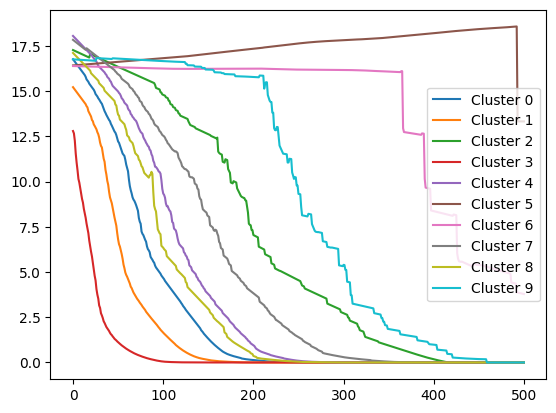

In [15]:
cluster_means = []
for c in np.unique(labels):
    cluster_means.append(X[labels == c].mean(axis=0).squeeze())
cluster_means = np.array(cluster_means)

import matplotlib.pyplot as plt
for i, mean in enumerate(cluster_means):
    plt.plot(mean, label=f"Cluster {i}")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


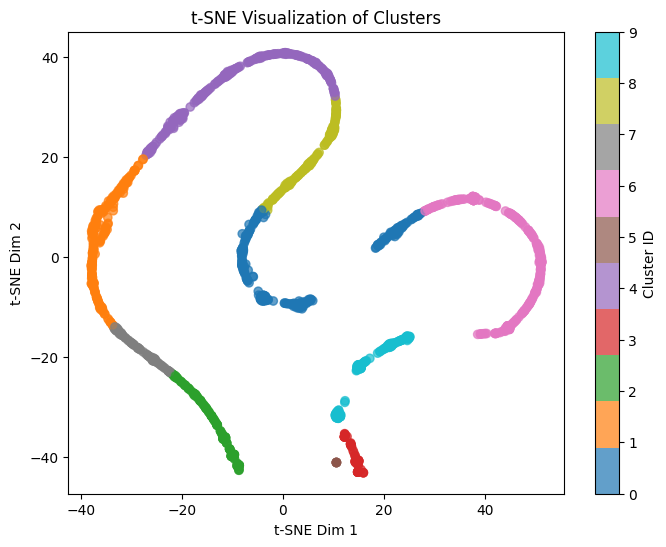

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce embeddings (high-dim) → 2D with t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=labels,
    cmap="tab10",
    alpha=0.7
)

plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.colorbar(scatter, label="Cluster ID")
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Load the autoencoder
autoencoder = load_model("autoencoder_model64.h5")

# If you saved encoder separately
encoder = load_model("encoder_model.h5")


To load the encoder form saved autoencoder
Maybe I should save encoder as well.

In [4]:

from tensorflow.keras import Model

# input is still the first layer
encoder_input = autoencoder.input

# "encoded" was the second LSTM (index depends on your architecture)
encoder_output = autoencoder.layers[2].output

# build encoder again
encoder = Model(encoder_input, encoder_output)

# now you can get embeddings
embeddings = encoder.predict(X)


44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 380ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


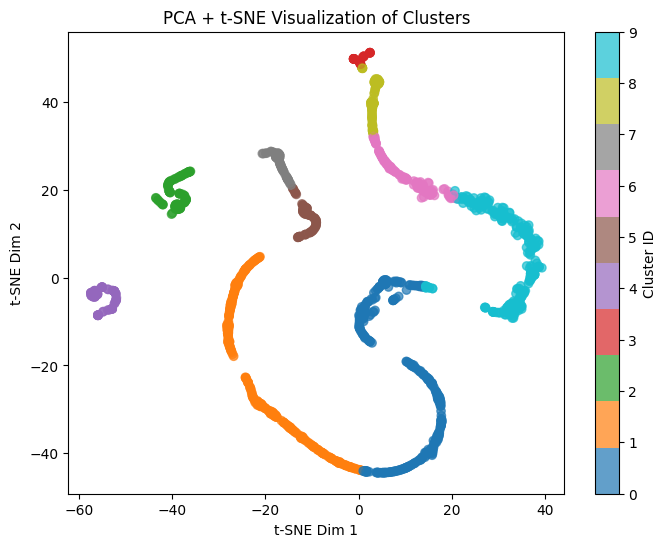

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Reduce dimensionality with PCA first (e.g., 64D → 20D)
pca = PCA(n_components=20, random_state=0)
embeddings_pca = pca.fit_transform(embeddings)

# Step 2: Apply t-SNE on PCA-reduced embeddings
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
embeddings_2d = tsne.fit_transform(embeddings_pca)

# Step 3: Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=labels,   # cluster/class labels
    cmap="tab10",
    alpha=0.7
)
plt.title("PCA + t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.colorbar(scatter, label="Cluster ID")
plt.show()
